# This Notebook Explores Computer Vision Using MNIST Dataset.

In [2]:
# Required libraries are loaded. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [3]:
# Files to be used.
path = "../../../Data/digit-recognizer/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


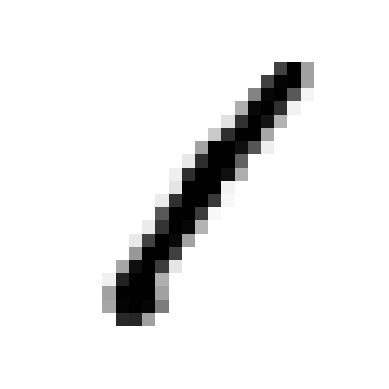

In [6]:
# Here we are visualizing a sample observation.
obs = train.iloc[0,][1:].to_numpy()
im = obs.reshape(28, 28)
plt.imshow(im, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
# Working with numpy is easier on sklearn.
X_train = train.loc[:,"pixel0":].to_numpy()
y_train = train.loc[:,"label"].to_numpy()
test = test.to_numpy()

### Grid Search KNeighbors for best parameter space.

In [9]:
knn_clf = KNeighborsClassifier()

In [10]:
# Parameters to search for the best model.
params = [{"n_neighbors": [2, 3, 4, 6], "weights": ["distance", "uniform"]}]

In [11]:
grid_search = GridSearchCV(knn_clf, params, cv=5, scoring="accuracy", verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.966 total time=   7.2s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.968 total time=   7.0s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.963 total time=   6.8s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.967 total time=   6.4s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.967 total time=   6.9s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.960 total time=   7.7s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.959 total time=   7.3s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.958 total time=   7.0s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.960 total time=   7.2s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.962 total time=   7.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   7.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 6],
                          'weights': ['distance', 'uniform']}],
             scoring='accuracy', verbose=3)

In [12]:
cvres = grid_search.cv_results_

for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"The mean_test_score is: {mean_test_score} and params: {params}")

The mean_test_score is: 0.9662380952380953 and params: {'n_neighbors': 2, 'weights': 'distance'}
The mean_test_score is: 0.9599523809523809 and params: {'n_neighbors': 2, 'weights': 'uniform'}
The mean_test_score is: 0.9678095238095239 and params: {'n_neighbors': 3, 'weights': 'distance'}
The mean_test_score is: 0.9666904761904762 and params: {'n_neighbors': 3, 'weights': 'uniform'}
The mean_test_score is: 0.9691428571428571 and params: {'n_neighbors': 4, 'weights': 'distance'}
The mean_test_score is: 0.9651190476190477 and params: {'n_neighbors': 4, 'weights': 'uniform'}
The mean_test_score is: 0.9677857142857142 and params: {'n_neighbors': 6, 'weights': 'distance'}
The mean_test_score is: 0.9650714285714287 and params: {'n_neighbors': 6, 'weights': 'uniform'}


### Data Augmentation

In [14]:
from scipy.ndimage import shift

In [15]:
def shift_image(image, dx, dy):
    """
    This function is used to shift an image down, up, left and right.
    """
    
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dx, dy], cval=0)
    shifted_image = shifted_image.reshape([-1])
    return shifted_image

In [16]:
def augment_data(predictors, labels):
    """
    This function augments both the predictors and labels.
    """
    augmented_predictors = [image for image in predictors]
    augmented_labels = [label for label in labels]
    
    rotations = [(1,0),(-1,0),(0,-1),(0,1)]
    for dx, dy in rotations:
        for image, label in zip(predictors, labels):
            shifted_image = shift_image(image, dx, dy)
            augmented_predictors.append(shifted_image)
            augmented_labels.append(label)
    augmented_predictors = np.array(augmented_predictors)
    augmented_labels = np.array(augmented_labels)
    return augmented_predictors, augmented_labels
X_train_augmented, y_train_augmented = augment_data(X_train, y_train)

In [17]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

### Train KNeighbors on best parameters and augmented data.

In [19]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [20]:
knn_clf.fit(X_train_augmented, y_train_augmented)
predictions = knn_clf.predict(test)

In [ ]:
scores = cross_val_score(knn_clf, X_train_augmented, y_train_augmented, cv=5)
print(np.mean(scores))

In [ ]:
df = pd.DataFrame()
df["ImageId"] = np.arange(1, 28001)
df["Label"] = predictions
df.to_csv("kneighbors_predictions.csv", index=False)

### Error Analysis

In [ ]:
y_train_pred = cross_val_predict(knn_clf, X_train_augmented, y_train_augmented, cv=3)
conf_mx = confusion_matrix(y_train_augmented, y_train_pred)
conf_mx